In [2]:
import lobi as lb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import os
import serial
from tqdm import tqdm

### Git pull?
- Start auf Windows: python -m jupyterlab

## Messung
    - Ordner erstellen mit Name der Messung

In [3]:
#Globale Angaben einer Messreihe
Name       = 'Zylinder0'
Messung    = 'Erste'
Elektroden = 32
SchunkStep = 180 #[grad/Schritt]
Modus      = 'e'
Objekt     = 'Zylinder'
Anzahl     = 2 #Anzahl der aufgenommenen Messwerte

In [4]:
#Sicherhaltshalber mehr Messungen
Anzahl +=5
#SchrittArray für Schunk Drehteller:
GRAD = np.arange(0,360,SchunkStep)

In [5]:
lb.gen_env(Messung,Elektroden,Modus,SchunkStep)

Ordner mit dem Namen:" Erste " wurde erstellt.


### Herstellen der Verbindung zum Spectra EIT-Kit

In [6]:
serialPort = lb.init("COM7")

Verbindung zu: COM7 erfolgreich hergestellt.


In [7]:
Anzahl = 2

### Ground truth

Bild gespeichert


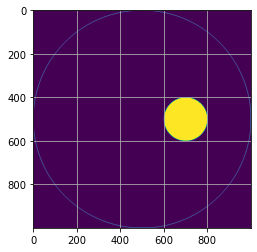

In [8]:
img1 = lb.ground_truth(['circle'],[50],[0*np.pi/2], Messung ,save_img=True)
plt.grid()
plt.imshow(img1,cmap='viridis')

## Mittelwert ohne Probe aufnehmen
- Beachten, dass keine Probe in der Messumgebung ist

In [14]:
Mean = []
Anzahl_mean = 3
try:
    print('Messung des Mittelwertbildes')    
    Mean = lb.measure_data(Anzahl_mean,serialPort)
except:
    Mean = []
    print('Bitte erneut ausführen')
Mean = np.mean(Mean,0)

Messung des Mittelwertbildes
Vorgang:  1 von:  3
Vorgang:  2 von:  3
Vorgang:  2 von:  3
Vorgang:  3 von:  3


In [ ]:
# Mittelwert speichern?
np.save('Mean', Mean)

### Messung für `Anzahl` an Werten starten
- `GRAD` ... Winkelschritte in °.
- `grad` ... wird auf den aktuellen Drehwinkel des Drehtellers gesetzt.
- Wenn die `Data` leer ist, wird die Iteration von `grad` neu gestartet.
- `try` wird zur verhinderung von nicht vollständigen Messungen verwendet.

In [17]:
check = 0
Data = []
while check < len(GRAD):
    grad = GRAD[check]
    #--- Schunk Teller auf Position drehen ---
    #---
    try:
        print('Messung des '+ str(grad) + '° Schritt')    
        Data = lb.measure_data(Anzahl,serialPort)
        lb.export_xlsx(Data,Messung,Mean,grad)
        check +=1
    except:
        Data = []
        print('Neustart. Daten sind nicht vollständig...')

Messung des 0° Schritt
Vorgang:  1 von:  2
Vorgang:  2 von:  2
Messung 0 erfolgreich exportier
Messung des 180° Schritt
Vorgang:  1 von:  2
Vorgang:  2 von:  2
Messung 180 erfolgreich exportier


## Visualisierung